In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
def get_unique_values_with_counts(dataframe, column_name):
    """
    This function returns a dictionary with unique values in a specified column of a dataframe
    and their corresponding counts.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to extract unique values and counts from.
    
    Returns:
    dict: A dictionary where keys are unique values and values are their counts.
    """
    value_counts = dataframe[column_name].value_counts()
    return value_counts.to_dict()

def plot_failure_rate_by_column(dataframe, column_name):
    """
    This function calculates and plots the failure rate by a given column.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to calculate and plot the failure rate by.
    
    Returns:
    None
    """
    # Calculate the failure rate by the given column
    failure_rate_by_column = dataframe.groupby(column_name)['failure'].mean().reset_index()

    # Rename columns for clarity
    failure_rate_by_column.columns = [column_name, 'failure_rate']

    # Sort the data for better visualization
    failure_rate_by_column_sorted = failure_rate_by_column.sort_values(by='failure_rate', ascending=False)

    # Plotting the failure rates by the given column
    plt.figure(figsize=(14, 8))
    plt.barh(failure_rate_by_column_sorted[column_name], failure_rate_by_column_sorted['failure_rate'], color='skyblue')
    plt.xlabel('Failure Rate')
    plt.ylabel(column_name)
    plt.title(f'Failure Rates by {column_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest failure rate on top
    plt.show()


In [3]:
data = pd.read_csv('ibm_filtered.csv')
data.head()

,project_type,project_phase_actual_end_date,project_description,project_phase_name,project_status_name,dsf_number_s,failure
0,SCA CIP,NaN,Facade/roofs,Construction,In-Progress,"DSF: 0000821031, 0000822210",False
1,SCA CIP,NaN,Facade/roofs,"CM, F&E",In-Progress,"DSF: 0000821031, 0000822210",False
2,SCA CIP RESOA,2017-08-03,Fy16 reso a ip surveillance camera installation,Scope,Complete,DSF: 0000823560,False
3,SCA CIP RESOA,NaN,Fy16 reso a ip surveillance camera installation,Design,In-Progress,DSF: 0000823560,True
4,SCA CIP RESOA,NaN,Fy16 reso a ip surveillance camera installation,Construction,PNS,DSF: 0000823560,False


In [4]:
data['dsf_number_s'] = data['dsf_number_s'].str.replace('DSF: ', '')
data['dsf_number_s'] = data['dsf_number_s'].str.replace('DSF:', '')

In [5]:
unique_project_types_with_counts = get_unique_values_with_counts(data, 'project_type')
unique_project_types_with_counts

{'SCA CIP RESOA': 2848,
 'SCA CIP': 2604,
 'SCA IEH': 652,
 'DIIT - RESOA': 473,
 'DOE - SKILLED TRADES': 339,
 'DOE- RESOA': 252,
 'SCA CAPACITY': 244,
 'DIIT - PROJECT CONNE': 195,
 'DOE - LEAD PAINT': 113,
 'TRUST FOR PUBLIC LAN': 107,
 'SCA FURNITURE & EQUI': 78,
 'SCA EMERGENCY LIGHTI': 72,
 'FAST TRACK PROJECTS': 60,
 'PRE-K': 56,
 'SCA LEASE SITE IMPRO': 44,
 'DIIT - PBX TELEPHONE': 28,
 'DCAS/NYPA': 10,
 'RCT CIP': 5,
 'SCA EMERGENCY RESPON': 4,
 'DOE MANAGED PREK': 1}

In [6]:
# From the glossary
project_type_mapping = {
    'SCA': 'School Construction Authority',
    'CIP': 'Capital Improvement Projects',
    'DIIT': 'Division of Instructional and Information Technology',
    'DOE': 'Department of Education',
    'DOES': 'Department of Environmental Services',
    'DOER': 'Department of Energy and Resources',
    'RESOA': 'Resolution "A" funding',
    'IEH': 'Industrial & Environmental Hygiene Division',
    'PREK': 'Pre-kindergarten',
    'PRE-K': 'Pre-kindergarten',
    'DCAS': 'Department of Citywide Administrative Services',
    'FY': 'Financial Year',
    'FAST TRACK PROJECTS': 'FAST TRACK PROJECTS',
}

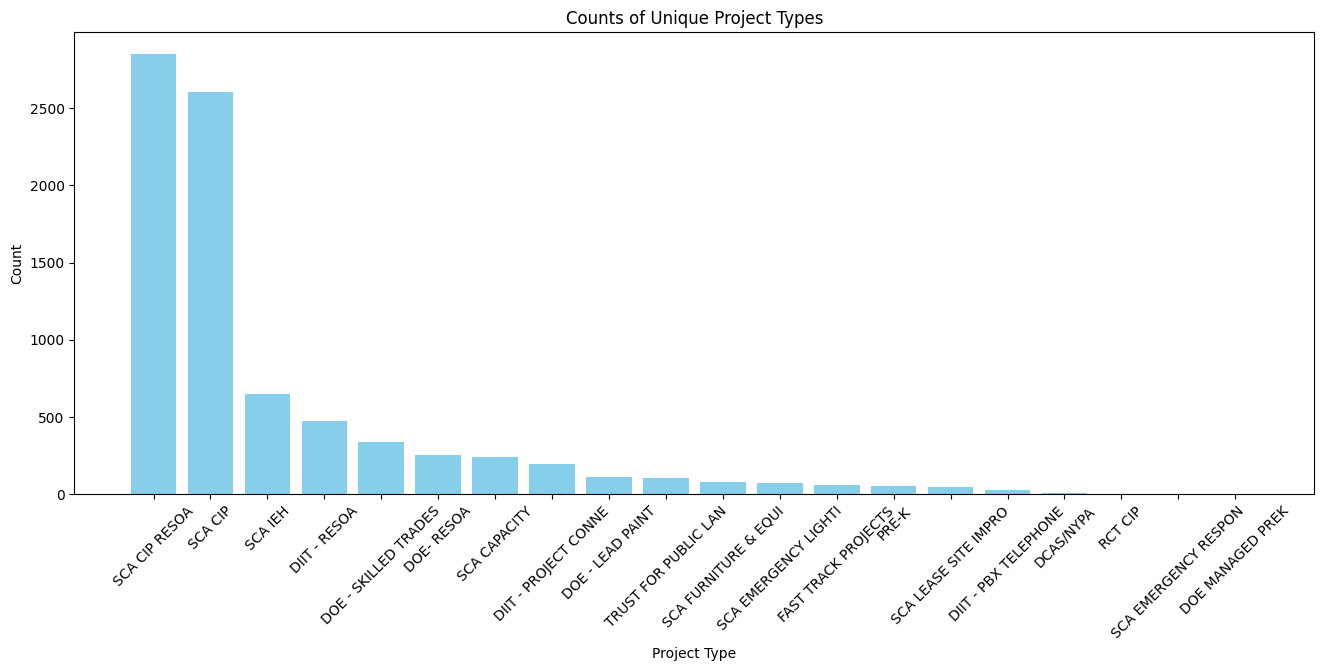

In [7]:
# Prepare data for plotting
values = list(unique_project_types_with_counts.keys())
counts = list(unique_project_types_with_counts.values())

# Plotting the unique values and their counts using matplotlib
plt.figure(figsize=(16, 6))
plt.bar(values, counts, color='skyblue')
plt.xlabel('Project Type')
plt.ylabel('Count')
plt.title('Counts of Unique Project Types')
plt.xticks(rotation=45)
plt.show()

### Failure by project type - unsplit

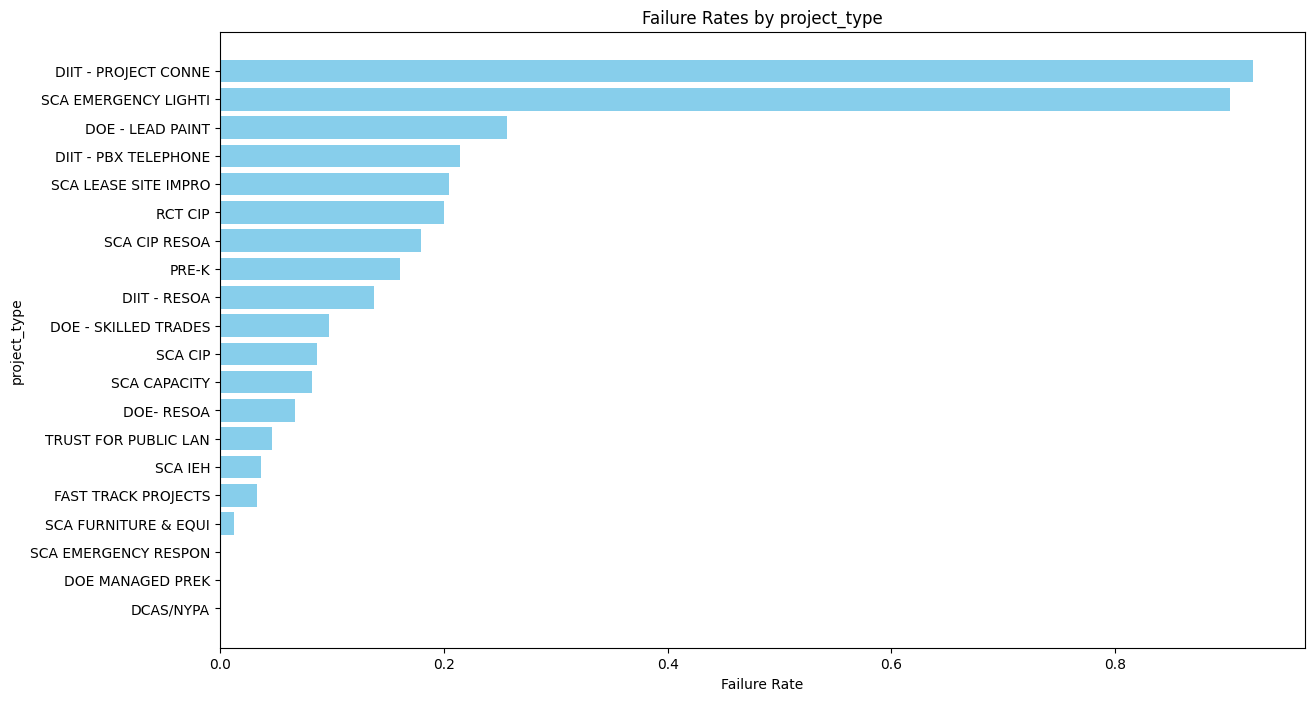

In [8]:
plot_failure_rate_by_column(data, 'project_type')

### Check the project types with no failures

In [9]:
data[data['project_type'] == 'DCAS/NYPA']

,project_type,project_phase_actual_end_date,project_description,project_phase_name,project_status_name,dsf_number_s,failure
204,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
815,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
1781,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
2271,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
4162,DCAS/NYPA,NaN,High efficiency lighting system,Construction,In-Progress,,False
6732,DCAS/NYPA,NaN,High efficiency lighting system,Construction,In-Progress,,False
7697,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
7822,DCAS/NYPA,NaN,High efficiency lighting system,Construction,In-Progress,,False
7859,DCAS/NYPA,2017-05-26,High efficiency lighting system,Construction,Complete,,False
7932,DCAS/NYPA,NaN,High efficiency lighting system,Construction,In-Progress,,False


In [10]:
data[data['project_type'] == 'DOE MANAGED PREK']

,project_type,project_phase_actual_end_date,project_description,project_phase_name,project_status_name,dsf_number_s,failure
4327,DOE MANAGED PREK,NaN,Pre-k center,Construction,In-Progress,0000865849,False


In [11]:
valid_project_types = set(project_type_mapping.keys())

data['project_type'] = data['project_type'].str.replace('-', '')
# Split the 'project_type' column by space and expand the rows
data_split = data.assign(project_type=data['project_type'].str.split(' ')).explode('project_type')
# data_split

In [12]:
# Map the project types to their descriptions
data_split['project_type_description'] = data_split['project_type'].map(project_type_mapping)
# Filter out rows where project_type is not in the mapping (i.e., NaN after mapping)
data_split = data_split.dropna(subset=['project_type_description']).reset_index(drop=True)

data_split

,project_type,project_phase_actual_end_date,project_description,project_phase_name,project_status_name,dsf_number_s,failure,project_type_description
0,SCA,NaN,Facade/roofs,Construction,In-Progress,"0000821031, 0000822210",False,School Construction Authority
1,CIP,NaN,Facade/roofs,Construction,In-Progress,"0000821031, 0000822210",False,Capital Improvement Projects
2,SCA,NaN,Facade/roofs,"CM, F&E",In-Progress,"0000821031, 0000822210",False,School Construction Authority
3,CIP,NaN,Facade/roofs,"CM, F&E",In-Progress,"0000821031, 0000822210",False,Capital Improvement Projects
4,SCA,2017-08-03,Fy16 reso a ip surveillance camera installation,Scope,Complete,0000823560,False,School Construction Authority
...,...,...,...,...,...,...,...,...
17681,CIP,NaN,Certificate of occupancy,Design,In-Progress,0000776207,True,Capital Improvement Projects
17682,SCA,NaN,Certificate of occupancy,Construction,PNS,0000776207,False,School Construction Authority
17683,CIP,NaN,Certificate of occupancy,Construction,PNS,0000776207,False,Capital Improvement Projects
17684,SCA,NaN,Certificate of occupancy,"CM, F&E",PNS,0000776207,False,School Construction Authority


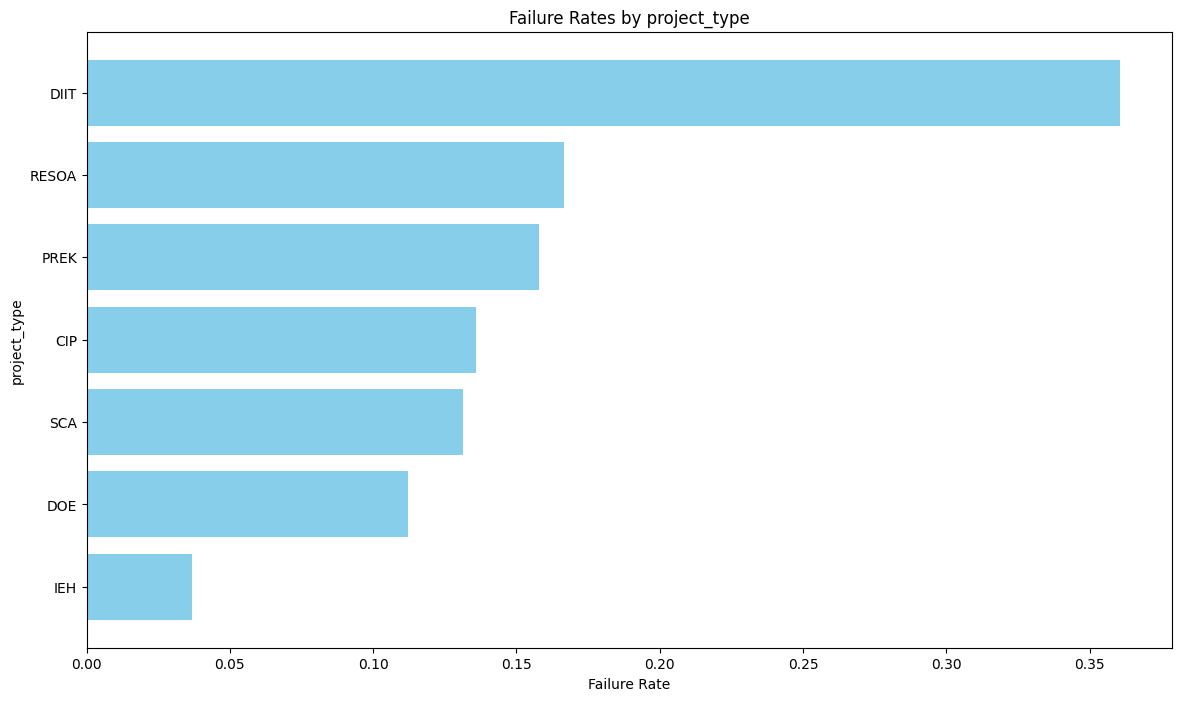

In [13]:
plot_failure_rate_by_column(data_split, 'project_type')


In [14]:
# Calculate the failure rate by project type
failure_rate_by_project_type = data_split.groupby('project_type')['failure'].mean().reset_index()

# Rename columns for clarity
failure_rate_by_project_type.columns = ['project_type', 'failure_rate']
failure_rate_by_project_type


,project_type,failure_rate
0,CIP,0.135789
1,DIIT,0.360632
2,DOE,0.112057
3,IEH,0.036810
4,PREK,0.157895
5,RESOA,0.166527
6,SCA,0.131225


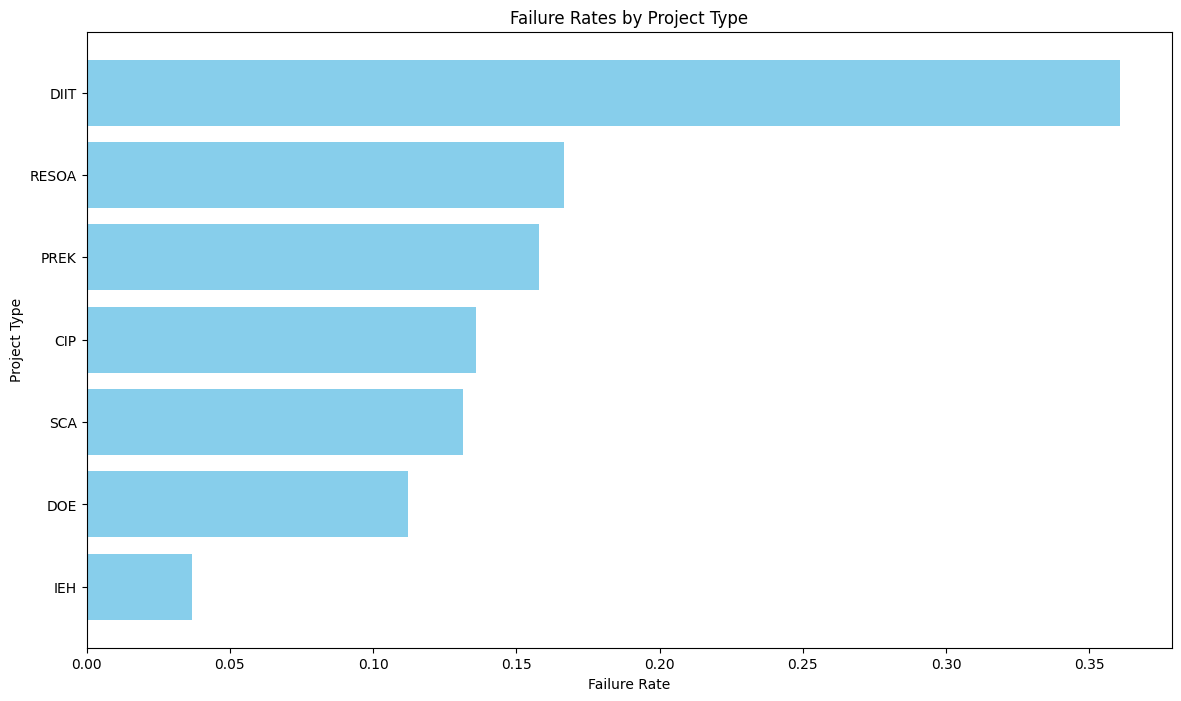

In [15]:
import matplotlib.pyplot as plt

# Sort the data for better visualization
failure_rate_by_project_type_sorted = failure_rate_by_project_type.sort_values(by='failure_rate', ascending=False)

# Plotting the failure rates by project type
plt.figure(figsize=(14, 8))
plt.barh(failure_rate_by_project_type_sorted['project_type'], failure_rate_by_project_type_sorted['failure_rate'], color='skyblue')
plt.xlabel('Failure Rate')
plt.ylabel('Project Type')
plt.title('Failure Rates by Project Type')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest failure rate on top
plt.show()